<a href="https://colab.research.google.com/github/dsnmcommodore/PHY-397-SCIENTIFIC-PROGRAMMING-3501822--FOR-PHYSICS-/blob/main/20900554(3501822).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

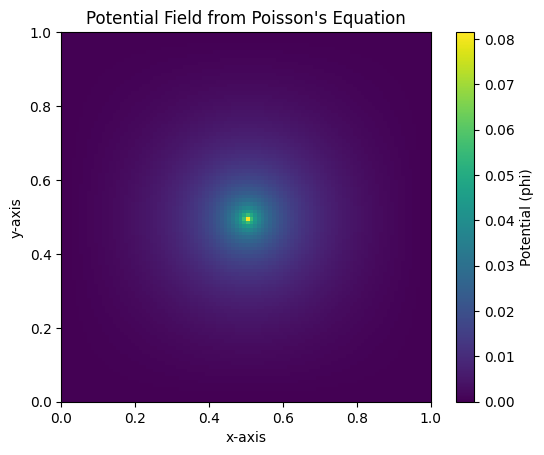

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set grid size
N = 100  # Number of points in each dimension
L = 1.0  # Domain length
hx = L / (N - 1)  # Step size in x-direction
hy = L / (N - 1)  # Step size in y-direction

# Initialize potential (phi) and source term (rho)
phi = np.zeros((N, N))  # Potential function (phi)
rho = np.zeros((N, N))  # Source term (rho)

# Define a simple source term; here we use a point charge at the center
rho[N//2, N//2] = -1000  # Adjust this value for varying density

# Iteration parameters
tolerance = 1e-5  # Stop condition for convergence
max_iterations = 10000  # Prevent infinite loops
iteration = 0

# Finite difference loop
while iteration < max_iterations:
    phi_new = phi.copy()  # Create a new array for the updated potential

    # Update potential using finite difference formula
    for i in range(1, N-1):  # Loop over internal grid points
        for j in range(1, N-1):
            # Central difference approximation
            phi_new[i, j] = 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] - hx*hx*rho[i, j])

    # Check for convergence (if the change in potential is small enough)
    if np.max(np.abs(phi_new - phi)) < tolerance:
        break  # Stop if we have converged

    phi = phi_new  # Update phi for the next iteration
    iteration += 1  # Increment the iteration count

# Plot the resulting potential
plt.imshow(phi, extent=(0, L, 0, L))
plt.colorbar(label='Potential (phi)')
plt.title('Potential Field from Poisson\'s Equation')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()